In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
order_items_data = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv")
order_items_data.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [3]:
order_items_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [4]:
# How many rows are there in total?
rows = order_items_data.shape[0]
rows

112650

In [5]:
# How many products are sold in each order (on average)?
order_product_sold = (
    order_items_data.groupby("order_id")
    .size()
    .reset_index(name = "item_count")
)
order_product_sold = order_product_sold["item_count"].mean()
order_product_sold

1.1417306873695092

In [6]:
# What’s the average item price?
avg_item_price = (
    order_items_data.groupby("product_id")["price"]
    .mean()
    .reset_index(name = "average_price")
)
avg_item_price.head(10)

,product_id,average_price
0,00066f42aeeb9f3007548bb9d3f33c38,101.65
1,00088930e925c41fd95ebfe695fd2655,129.90
2,0009406fd7479715e4bef61dd91f2462,229.00
3,000b8f95fcb9e0096488278317764d19,58.90
4,000d9be29b5207b54e86aa1b1ac54872,199.00
5,0011c512eb256aa0dbbb544d8dffcf6e,52.00
6,00126f27c813603687e6ce486d909d01,249.00
7,001795ec6f1b187d37335e1c4704762e,38.90
8,001b237c0e9bb435f2e54071129237e9,78.90
9,001b72dfd63e9833e8c02742adf472e3,34.99


In [7]:
# What’s the total freight value?
total_freight_value = order_items_data["freight_value"].sum()
total_freight_value

2251909.54

In [8]:
# What is the minimum and maximum price of any product?
min_max_price = (
    order_items_data.groupby("product_id")
    .agg(
        min_price = ("price", "min"),
        max_price = ("price", "max")
    )
    .reset_index()
)
min_max_price.head(10)

,product_id,min_price,max_price
0,00066f42aeeb9f3007548bb9d3f33c38,101.65,101.65
1,00088930e925c41fd95ebfe695fd2655,129.90,129.90
2,0009406fd7479715e4bef61dd91f2462,229.00,229.00
3,000b8f95fcb9e0096488278317764d19,58.90,58.90
4,000d9be29b5207b54e86aa1b1ac54872,199.00,199.00
5,0011c512eb256aa0dbbb544d8dffcf6e,52.00,52.00
6,00126f27c813603687e6ce486d909d01,249.00,249.00
7,001795ec6f1b187d37335e1c4704762e,38.90,38.90
8,001b237c0e9bb435f2e54071129237e9,78.90,78.90
9,001b72dfd63e9833e8c02742adf472e3,34.99,34.99


In [9]:
# How many unique sellers are in the dataset?
unique_sellers = order_items_data["seller_id"].nunique()
unique_sellers

3095

In [10]:
# What is the average number of items per seller?
avg_items_per_seller = order_items_data.groupby("seller_id").size().mean()
avg_items_per_seller

36.39741518578352

In [11]:
# What’s the total revenue (sum of price) per seller?
total_revenue = order_items_data["price"].sum()
total_revenue

13591643.7

In [12]:
# Which seller has the most items sold (count)?
item_sold_per_seller = (
    order_items_data.groupby("seller_id").size().reset_index(name = "items_sold")
    .sort_values(by = "items_sold", ascending = False)
)
item_sold_per_seller.head(1)

,seller_id,items_sold
1235,6560211a19b47992c3666cc44a7e94c0,2033


In [13]:
# Which order had the highest total price?
price_per_order = (
    order_items_data.groupby("order_id")["price"]
    .sum()
    .reset_index(name = "total_price")
    .sort_values(by = "total_price", ascending = False)
)
price_per_order.head(1)

,order_id,total_price
1455,03caa2c082116e1d31e67e9ae3700499,13440.0


In [14]:
# Which order had the highest freight cost?
higest_freight_cost = order_items_data.sort_values(by = "freight_value", ascending = False)
higest_freight_cost.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
73486,a77e1550db865202c56b19ddc6dc4d53,1,ec31d2a17b299511e7c8627be9337b9b,257e61d3251fb5efb9daadddbc2cf7ca,2018-04-25 06:55:13,979.0,409.68


In [15]:
# What is the average shipping limit date difference per seller?
order_items_data["shipping_limit_date"] = pd.to_datetime(order_items_data["shipping_limit_date"])
seller_date_range = (
    order_items_data.groupby("seller_id")["shipping_limit_date"]
    .agg(min_date = "min", max_date = "max")
    .reset_index()
)

seller_date_range["date_diff"] = (seller_date_range["max_date"] - seller_date_range["min_date"]).dt.days
avg_shipping_range = seller_date_range["date_diff"].mean()
avg_shipping_range

175.7647819063005

In [16]:
# Which seller has the highest average freight cost per item?
avg_freight_per_seller = (
    order_items_data.groupby("seller_id")["freight_value"]
    .agg(avg_value = "mean")
    .sort_values(by = "avg_value", ascending = False)
)
avg_freight_per_seller.head(1)

,avg_value
seller_id,
6fa9202c10491e472dffd59a3e82b2a3,308.336667


In [17]:
# List all sellers with more than 1,000 items sold?
item_sold_per_seller = order_items_data.groupby("seller_id").size().reset_index(name = "total_sold_item")
item_sold_per_seller = item_sold_per_seller[item_sold_per_seller["total_sold_item"] > 1000]
item_sold_per_seller.head(10)

,seller_id,total_sold_item
192,1025f0e2d44d7041d6cf58b6550e0bfa,1428
368,1f50f920176fa81dab994f9023523100,1931
731,3d871de0142ce09b7081e2b9d1733cb1,1147
857,4869f7a5dfa277a7dca6462dcf3b52b2,1156
881,4a3ca9315b744ce9f8e9374361493884,1987
1235,6560211a19b47992c3666cc44a7e94c0,2033
1505,7a67c85e85bb2ce8582c35f2203ad736,1171
1535,7c67e1448b00f6e969d365cea6b010ab,1364
1708,8b321bb669392f5163d04c59e235e066,1018
1824,955fee9216a65b617aa5c0531780ce60,1499


In [18]:
# How many products were sold with price over 100?
product_sold_more_than_100 = (order_items_data["price"] > 100)
product_sold_more_than_100

0         False
1          True
2          True
3         False
4          True
          ...  
112645     True
112646     True
112647    False
112648    False
112649    False
Name: price, Length: 112650, dtype: bool

In [19]:
# Which seller has the highest average revenue per order (with at least 10 orders)?
seller_order_revenue = order_items_data.groupby(["seller_id", "order_id"])["price"].sum().reset_index(name = "total_price")
seller_avg_revenue = (
    seller_order_revenue.groupby("seller_id")
    .agg(
        total_orders = ("order_id", "size"),
        average_revenue = ("total_price", "mean")
    )
    .reset_index()
)
seller_avg_revenue = seller_avg_revenue[seller_avg_revenue["total_orders"] >= 10].sort_values(by = "total_orders", ascending = False)
seller_avg_revenue["average_revenue"] = seller_avg_revenue["average_revenue"].round(2)
seller_avg_revenue.head(10)

,seller_id,total_orders,average_revenue
1235,6560211a19b47992c3666cc44a7e94c0,1854,66.51
881,4a3ca9315b744ce9f8e9374361493884,1806,111.00
2481,cc419e0650a3c5ba77189a1882b7556a,1706,61.13
368,1f50f920176fa81dab994f9023523100,1404,76.17
2643,da8622b14eb17ae2831f4ac5b9dab84a,1314,121.95
1824,955fee9216a65b617aa5c0531780ce60,1287,105.03
1505,7a67c85e85bb2ce8582c35f2203ad736,1160,122.19
2836,ea8482cd71df3c1969d7b9473ff13abc,1146,32.44
857,4869f7a5dfa277a7dca6462dcf3b52b2,1132,202.71
731,3d871de0142ce09b7081e2b9d1733cb1,1080,87.88


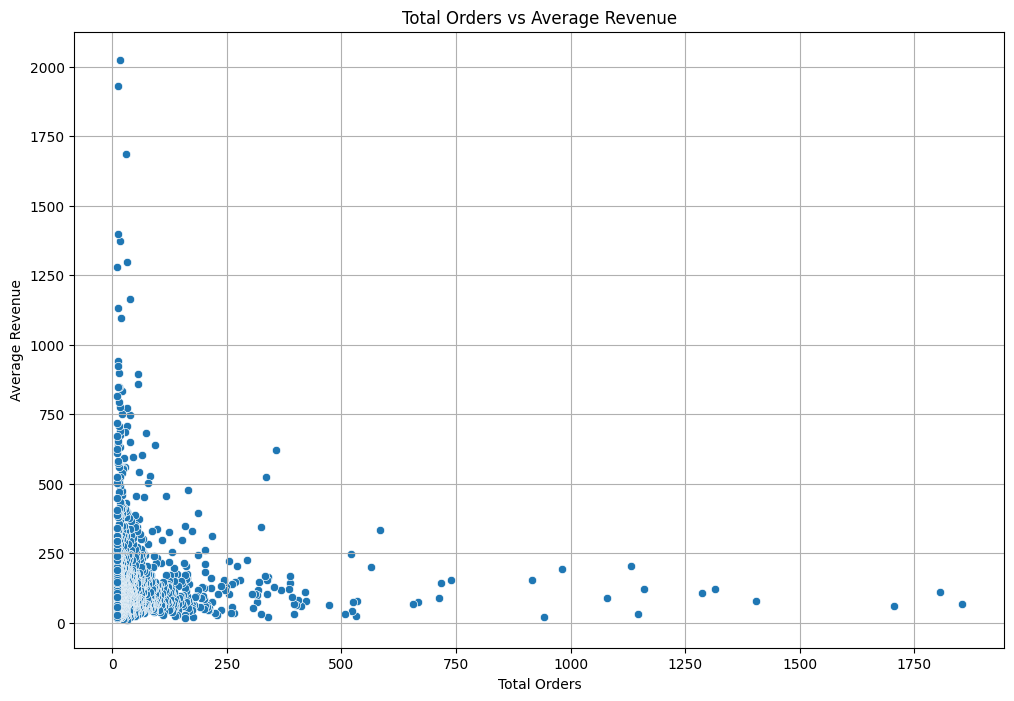

In [20]:
plt.figure(figsize = (12, 8))
sns.scatterplot(
    data = seller_avg_revenue,
    x = "total_orders",
    y = "average_revenue"
)
plt.title("Total Orders vs Average Revenue")
plt.xlabel("Total Orders")
plt.ylabel("Average Revenue")
plt.grid(True)
plt.show()

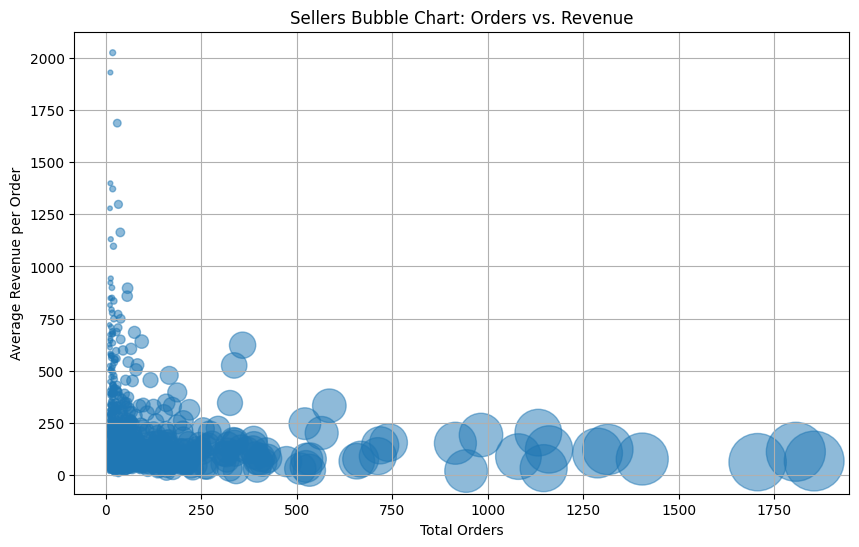

In [21]:
# Optional if you also have total_items
seller_avg_revenue["bubble_size"] = seller_avg_revenue["total_orders"]

plt.figure(figsize=(10,6))
plt.scatter(
    seller_avg_revenue["total_orders"],
    seller_avg_revenue["average_revenue"],
    s=seller_avg_revenue["bubble_size"],  # size of the bubble
    alpha=0.5
)
plt.title("Sellers Bubble Chart: Orders vs. Revenue")
plt.xlabel("Total Orders")
plt.ylabel("Average Revenue per Order")
plt.grid(True)
plt.show()


In [22]:
# Rank sellers by total revenue within each month (use shipping_limit_date)?
order_items_total_temp = order_items_data.copy()
order_items_total_temp["month"] = pd.to_datetime(order_items_total_temp["shipping_limit_date"]).dt.month

revenue_per_month = (
    order_items_total_temp.groupby(["month", "seller_id"])["price"]
    .sum()
    .reset_index(name = "total_revenue_per_month")
)
revenue_per_month["rank"] = (
    revenue_per_month
    .groupby("month")["total_revenue_per_month"]
    .rank(method = "dense", ascending = False)
)
revenue_per_month.sort_values(["month", "rank"]).head(10)

,month,seller_id,total_revenue_per_month,rank
264,1,3d871de0142ce09b7081e2b9d1733cb1,21643.80,1.0
865,1,da8622b14eb17ae2831f4ac5b9dab84a,17498.00,2.0
308,1,4869f7a5dfa277a7dca6462dcf3b52b2,16806.80,3.0
999,1,fa1c13f2614d7b5c4749cbc52fecda94,16434.64,4.0
614,1,955fee9216a65b617aa5c0531780ce60,16262.16,5.0
314,1,4a3ca9315b744ce9f8e9374361493884,12151.50,6.0
354,1,53243585a1d6dc2643021fd1853d8905,11088.00,7.0
659,1,a1043bafd471dff536d0c462352beb48,11076.71,8.0
417,1,620c87c171fb2a6dd6e8bb4dec959fc6,10624.15,9.0
135,1,1ca7077d890b907f89be8c954a02686a,9651.83,10.0


In [23]:
# Which orders contain more than one seller?
unique_seller_per_order = order_items_data.groupby("order_id")["seller_id"].nunique().reset_index(name = "seller_count")
unique_seller_per_order = unique_seller_per_order[unique_seller_per_order["seller_count"] > 1].sort_values(by = "seller_count", ascending = False)
unique_seller_per_order.head(10)

,order_id,seller_count
10831,1c11d0f4353b31ac3417fbfa5f0f2a8a,5
79967,cf5c8d9f52807cb2d2f0a0ff54c478da,5
53796,8c2b13adf3f377c8f2b06b04321b0925,4
55847,91be51c856a90d7efe86cf9d082d6ae3,4
11231,1d23106803c48c391366ff224513fb7f,4
77675,c98ec8cb960d61c4375413b70f225104,3
47037,7a35319beabf36472c45cc9ba67f0745,3
20349,34fdc362961364d3ff08986ccff2212d,3
4875,0c82a229fc22597c2361656cba8d3230,3
34115,589eac637e68da58add10ee5e6710bac,3


In [24]:
# Find the top 3 most expensive items (price + freight) per seller?
expensive_items_data = order_items_data.loc[:, ("seller_id", "price", "freight_value")]
expensive_items_data["total_spend"] = expensive_items_data["price"] + expensive_items_data["freight_value"]

# expensive
expensive_items_data.head(10)

,seller_id,price,freight_value,total_spend
0,48436dade18ac8b2bce089ec2a041202,58.90,13.29,72.19
1,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,259.83
2,5b51032eddd242adc84c38acab88f23d,199.00,17.87,216.87
3,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,25.78
4,df560393f3a51e74553ab94004ba5c87,199.90,18.14,218.04
5,6426d21aca402a131fc0a5d0960a3c90,21.90,12.69,34.59
6,7040e82f899a04d1b434b795a43b4617,19.90,11.85,31.75
7,5996cddab893a4652a15592fb58ab8db,810.00,70.75,880.75
8,a416b6a846a11724393025641d4edd5e,145.95,11.65,157.60
9,ba143b05f0110f0dc71ad71b4466ce92,53.99,11.40,65.39


In [25]:
# Which products are sold by more than 1 seller?
product_seller_counts = (
    order_items_data.groupby("product_id")["seller_id"]
    .nunique()
    .reset_index(name="seller_count")
)

products_multiple_sellers = product_seller_counts[product_seller_counts["seller_count"] > 1]
products_multiple_sellers.head(10)

,product_id,seller_count
110,00f179926ae5965cd6ff548d765d8a61,2
113,00f8c37377b038c9c791128d2f928111,2
116,00fefaf41156bb4b0d850fb27da97897,2
155,013e6676e0e3529e5909ff54370daddf,2
184,0168e1b28d8e55a515928cf656eff0a4,2
214,01a2ad2b54cd734f78cb817da7752d8b,2
251,01da7f08d8327e0b4fab7edaa0c417a4,2
318,027cdd14a677a5834bc67a9789db5021,3
322,02851253400fd18410f8eb4369cff9e1,2
358,02ce467092b184e71d3967d29110adc1,2


In [26]:
# Compute price-to-freight ratio per item and find top 10 highest ratios?
order_items_data["freight_value"] = order_items_data["freight_value"].replace(0, np.nan)
order_items_data["price_freight_ratio"] = order_items_data["price"] / order_items_data["freight_value"]
order_items_data_clean = order_items_data.dropna(subset=["price_freight_ratio"])

top_10_ratio_items = (
    order_items_data_clean
    .sort_values(by="price_freight_ratio", ascending=False)
    .loc[:, ["order_id", "order_item_id", "product_id", "seller_id", "price", "freight_value", "price_freight_ratio"]]
    .head(10)
)

top_10_ratio_items

,order_id,order_item_id,product_id,seller_id,price,freight_value,price_freight_ratio
106668,f26d3cc4231c7230b8603f2beede9ea9,2,28857b241545853875bda6661ccdf0f7,2b2fed75b8e5ea3a052fc4c0825da485,113.00,0.01,11300.000000
28981,41ef253cac66335bdb0b51fb4853f04e,1,c4a6de6225217d4539c861c0b6316d86,7b07b3c7487f0ea825fc6df75abd658b,99.90,0.01,9990.000000
15746,24014414a15d7274cad8a2917fe1f040,2,77ccda894b672fe1214b0101d108d7f7,e24fc9fcd865784fb25705606fe3dfe7,672.00,0.07,9600.000000
49446,7062eab93cccc51550b18e1787e7b8b1,1,78f3f7fb2c7a8a53bccb6cfc49f34f66,e9779976487b77c6d4ac45f75ec7afe9,92.99,0.01,9299.000000
68356,9c3e52105d896e40a480b47029e36fb8,2,81de659bfde3389fc8614bfba92e585a,1025f0e2d44d7041d6cf58b6550e0bfa,360.00,0.06,6000.000000
70667,a13562e9c4b0eb8e6ae0946073b213f8,2,18e41d0c2a7cac6a8d53d3fcc13da3c4,2b3e4a2a3ea8e01938cabda2a3e5cc79,1180.95,0.21,5623.571429
71005,a1fa82769a203e30b8faf81cd32e5193,2,24aba57735be13fd785bc04d1a8812e4,b335c59ab742f751a85db9c411a86739,205.00,0.05,4100.000000
37231,547b3596c03dfad1b87305e9c5a554c2,3,457cd0a99cfa977993e4eb6d98d95abb,ea8482cd71df3c1969d7b9473ff13abc,39.99,0.01,3999.000000
41983,5f9d46795c3126674e52becb3a1a517f,2,ca165220cdeb3367ea870193baf4a7cd,f664f98bfda2eaf266a23ff144e7a872,119.00,0.03,3966.666667
49174,6fb94eba66b44dad1973e9109f89136d,3,08d76e49b8206d0cfb7456fe3aa7d3b4,a3a38f4affed601eb87a97788c949667,109.00,0.03,3633.333333


In [27]:
# Find the order-seller pairs where the freight cost is more than the item price?
freight_vs_price_grouped = (
    order_items_data.groupby(["order_id", "seller_id"], as_index=False)
    .agg(
        total_price=("price", "sum"),
        total_freight=("freight_value", "sum")
    )
)

freight_more_than_price = freight_vs_price_grouped[
    freight_vs_price_grouped["total_freight"] > freight_vs_price_grouped["total_price"]
]

freight_more_than_price.head(10)

,order_id,seller_id,total_price,total_freight
52,0025081dcf9330f9a5052ae82c6ce396,5f3ae9136c875522250f8184f253413a,14.95,18.23
73,002f98c0f7efd42638ed6100ca699b42,7299e27ed73d2ad986de7f7c77d919fa,8.99,32.57
100,003edccf16bc5ec447f592913b3df2b4,ef506c96320abeedfb894c34db06f478,14.00,50.85
114,00482f2670787292280e0a8153d82467,702835e4b785b67a084280efca355756,7.60,10.96
138,00602f25bffa1dcfb71e202fbf9824fb,86ccac0b835037332a596a33b6949ee1,39.90,54.02
174,0080eebb288dba1857ccf048dfe6bdfe,cc419e0650a3c5ba77189a1882b7556a,7.00,14.10
185,008a1b3db2a8bf63418c2cf7c7f494b1,8b28d096634035667e8263d57ba3368c,14.89,18.23
190,008d9bf350ff02ed444b3452cf3f57e0,1da3aeb70d7989d1e6d9b0e887f97c23,19.98,30.46
191,008dc31c0ae7121f2791953ae5f532c3,6a8b085f816a1f75f92dbac6eb545f8f,28.50,34.15
204,0095790a64527ec83aeaaf99023c050e,3d871de0142ce09b7081e2b9d1733cb1,19.90,42.76


In [28]:
# Calculate total sales and freight by day using shipping_limit_date (time series analysis)?
order_items_data["shipping_limit_date"] = pd.to_datetime(order_items_data["shipping_limit_date"])
order_items_data["shipping_date"] = order_items_data["shipping_limit_date"].dt.date

daily_sales_freight = (
    order_items_data.groupby("shipping_date")
    .agg(
        total_sales=("price", "sum"),
        total_freight=("freight_value", "sum")
    )
    .reset_index()
)

daily_sales_freight.head(10)

,shipping_date,total_sales,total_freight
0,2016-09-19,194.47,24.05
1,2016-10-08,908.29,194.09
2,2016-10-09,1545.57,243.37
3,2016-10-10,7607.91,1323.12
4,2016-10-11,7350.06,1043.57
5,2016-10-12,5160.31,604.23
6,2016-10-13,1818.15,224.06
7,2016-10-14,5767.93,883.09
8,2016-10-15,2400.16,470.78
9,2016-10-16,1658.59,207.41
